In [428]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle
from copy import deepcopy

In [429]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [430]:
dfs = df

In [431]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

In [432]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [433]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [434]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [435]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [436]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [437]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [438]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [439]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [440]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [441]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [442]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [443]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [444]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.0678188569245, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.72272863323, 492.40317589072635, 8226.20896899483, 16305.371451274925, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149963, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768696, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355396, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.

In [445]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-15 00:00:00+00:00    38
2020-11-25 00:00:00+00:00    38
2020-11-16 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-22 00:00:00+00:00    37
2020-11-21 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-23 00:00:00+00:00    36
2020-11-20 00:00:00+00:00    36
2020-11-04 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-14 00:00:00+00:00    35
2020-11-19 00:00:00+00:00    34
2020-11-01 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-11 00:00:00+00:00    34
2020-11-30 00:00:00+00:00    34
2020-11-02 00:00:00+00:00    33
2020-11-08 00:00:00+00:00    33
2020-11-07 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-27 00:00:00+00:00    33
2020-11-12 00:00:00+00:00    32
2020-11-06 00:00:00+00:00    32
2020-11-05 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [446]:
# dfs[dfs["day"].isin({day, day_after})]

In [447]:
day = "2020-11-21 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-22 00:00:00+00:00"
day_before = "2020-11-20 00:00:00+00:00"
dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]

In [448]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
1216201   SIA231       9V-SMI     A359   WSSS        YSSY   
1220352  SIA7296       9V-SFP     B744   WSSS        YSSY   
1223142  SIA7951       9V-SFI     B744   EBMB        VABB   
1227439   SIA319       9V-SMP     A359   EGLL        WSSS   
1229204  SIA7321       9V-SFQ     B744   KLAX        EHAM   
1235197  SIA7394       9V-SFM     B744   WSSS        OMSJ   
1237066   SIA298       9V-SMD     A359   NZCH        WSSS   
1244788   SIA308       9V-SML     A359   WSSS        EGLL   
1248094  SIA7294       9V-SFO     B744   WSSS        YMML   
1249343  SIA7980       9V-SFN     B744   WSSS        VHHH   
1250949  SIA7295       9

In [449]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': [],
        'fixed_cost': [],
        'min_cost': [],
        'idle_cost': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity, fixed_cost, min_cost, idle_cost]
Index: []


In [450]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [451]:
airplanes_capacity = []
airplanes_fixedcost = []
airplanes_idlecost = []
airplanes_minutecost = []

for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
                min_cost = 244
                fixed_cost = 946.069
                idle_min_cost = 195
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
                min_cost = 321
                fixed_cost = 851.244
                idle_min_cost = 257
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
                min_cost = 194
                fixed_cost = 969.244
                idle_min_cost = 155
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
                min_cost = 116
                fixed_cost = 732.745
                idle_min_cost = 92
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
                min_cost = 187
                fixed_cost = 1001.250
                idle_min_cost = 150
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
                min_cost = 433
                fixed_cost = 638.418
                idle_min_cost = 347
            airplanes_capacity.append(int(capacity))
            airplanes_fixedcost.append(int(fixed_cost))
            airplanes_idlecost.append(int(idle_min_cost))
            airplanes_minutecost.append(int(min_cost))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [452]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane],
                        'fixed_cost': airplanes_fixedcost[no_airplane],
                        'min_cost': airplanes_minutecost[no_airplane],
                        'idle_cost': airplanes_idlecost[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane],
                                'fixed_cost': airplanes_fixedcost[no_airplane],
                                'min_cost': airplanes_minutecost[no_airplane],
                                'idle_cost': airplanes_idlecost[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane],
                                        'fixed_cost': airplanes_fixedcost[no_airplane],
                                        'min_cost': airplanes_minutecost[no_airplane],
                                        'idle_cost': airplanes_idlecost[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity  fixed_cost  \
0    9V-SMG  A359     LSZH  2020-11-19 17:47:48+00:00     350.0       946.0   
1    9V-SMI  A359     WSSS  2020-11-20 17:54:12+00:00     350.0       946.0   
2    9V-SMT  A359     WSSS  2020-11-20 11:11:12+00:00     350.0       946.0   
3    9V-SMD  A359     NZCH  2020-11-20 22:51:25+00:00     350.0       946.0   
4    9V-SMH  A359     LFPG  2020-11-21 10:03:18+00:00     350.0       946.0   
5    9V-SFN  B744     WSSS  2020-11-21 03:07:03+00:00     416.0       851.0   
6    9V-SMC  A359     WSSS  2020-11-20 02:40:15+00:00     350.0       946.0   
7    9V-SFM  B744     WSSS  2020-11-20 22:21:21+00:00     416.0       851.0   
8    9V-SMS  A359     WSSS  2020-11-20 12:00:28+00:00     350.0       946.0   
9    9V-SFK  B744     WSSS  2020-11-18 20:05:28+00:00     416.0       851.0   
10   9V-SML  A359     WSSS  2020-11-21 01:12:22+00:00     350.0       946.0   
11   9V-SWQ  B77W     WSSS  2020-11-18 17:03:08+00:0

In [453]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [454]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [455]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [456]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946.069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851.244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969.244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732.745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001.250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638.418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    
    return fitness

In [457]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    fitness.append(plane_count)
    
    return fitness

In [458]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [459]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [460]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [461]:
def rao3(solutions, rand_solution, best_solution, worst_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        rao3_done = False
        while (rao3_done == False):
#             print(1)
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)
     
            if(len(available_airplanes) >= 3):
                rao3_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]
                    xworst = airplanes[variable].iloc[worst_solution[rand_flight][1]]

                    if(countFitness(solution)[0] > countFitness(rand_solution)[0]):
                        or1 = xsolution
                        or2 = xrandsolution
                    else:
                        or1 = xrandsolution
                        or2 = xsolution

                    xsolution = xsolution + (random.random()*(xbests- abs(xworst))) + (random.random()*(abs(or1) - abs(or2)))
                    if(variable=="capacity"):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    rao3_solution.append(xsolution)
                rao3_solution = np.array(rao3_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(rao3_solution - airplane_solution)    

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                        
                rao3_done = True
                if(rao3_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
#         state = random.randint(0,1)
        
    return new_solution 

In [462]:
def crossover(besthqs, xbest):
    start_solution = deepcopy(besthqs)
    state = 1
    while (state == 1):
        crossover_done = False
        while (crossover_done == False):
            solution = deepcopy(start_solution)
            best_solution = deepcopy(xbest)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist1 = []
            airplanelist2 = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist1.append(airplane)
                airplanelist2.append(airplane)
            for j in range(rand_flight):
                airplanelist1[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist1[solution[j][1]][2] = solution[j][3]
                airplanelist2[best_solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist2[best_solution[j][1]][2] = best_solution[j][3]

            available_airplanes1 = []
            available_airplanes2 = []
            for airplane in airplanelist1:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes1.append(airplane)
            for airplane in airplanelist2:        
                if (airplane[0] != best_solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes2.append(airplane)    

            if(len(available_airplanes1) >= 3 and len(available_airplanes2) >= 3):
                crossover_solution1 = []
                crossover_solution2 = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]

                    r = random.random()
                    while (r==0.5):
                        r = random.random()
                    xsolution1 = r*xsolution + (1-r)*xbests
                    xsolution2 = r*xbests + (1-r)*xsolution
                    
                    if(variable=="capacity"):
                        xsolution1 = xsolution1*2.428*flight_len
                        xsolution2 = xsolution2*2.428*flight_len
                    else:
                        xsolution1 = xsolution1*flight_len
                        xsolution2 = xsolution2*flight_len
                    crossover_solution1.append(xsolution1)
                    crossover_solution2.append(xsolution2)
                crossover_solution1 = np.array(crossover_solution1)
                crossover_solution2 = np.array(crossover_solution2)

                for airplane in available_airplanes1:
                    airplane_solution1 = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution1.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution1.append(airplane[i+4]*flight_len)
                    airplane_solution1 = np.array(airplane_solution1)
                    airplane[-1] = np.linalg.norm(crossover_solution1 - airplane_solution1)
                    
                for airplane in available_airplanes2:
                    airplane_solution2 = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution2.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution2.append(airplane[i+4]*flight_len)
                    airplane_solution2 = np.array(airplane_solution2)
                    airplane[-1] = np.linalg.norm(crossover_solution2 - airplane_solution2)
                    

                new_solution1 = []
                available_airplanes1 = sorted(available_airplanes1,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes1[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution1.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution1[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution1[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution1[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution1[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution1[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution1[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution1.append(newflight)

                new_solution2 = []
                available_airplanes2 = sorted(available_airplanes2,key=lambda l:l[7], reverse=True)
                airplane1 = best_solution[rand_flight][1]
                airplane2 = available_airplanes2[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(best_solution)):
                    if(l < rand_flight):
                        new_solution2.append(best_solution[l])
                        if(best_solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(best_solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = best_solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(best_solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution2[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution2[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution2[last_pos2][3] + (best_solution[l][3]-best_solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(best_solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution2[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution2[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution2[last_pos1][3] + (best_solution[l][3]-best_solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution2.append(newflight)

                crossover_done = True
                if(crossover_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution1)
                    
#         state = random.randint(0,1)
        
    return new_solution1, new_solution2

In [463]:
def mutation(xbest, var_a, var_b):
#     xbest = deepcopy(xbests)
    start_solution = deepcopy(xbest)
    state = 1
    while (state == 1):
        mutation_done = False
        if(random.random() >= var_b):
            mutation_done = True
            new_solution = start_solution
        while (mutation_done == False):
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1)
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)

            if(len(available_airplanes) >= 3):
                mutation_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                index = 4
                for variable in variables:
                    airplanelist = sorted(airplanelist,key=lambda l:l[index], reverse=True)
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]               
                    uppervar =  airplanelist[0][index]
                    lowervar =  airplanelist[-1][index]
                    xsolution = xsolution + (2*random.random()-1) * var_a*abs(uppervar - lowervar)
                    index = index + 1
                    if(index==5):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    mutation_solution.append(xsolution)
                mutation_solution = np.array(mutation_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(mutation_solution - airplane_solution)
            

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                mutation_done = True
                if(mutation_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
                
#         state = random.randint(0,1)
                
    return new_solution 

In [464]:
def randomwalk(solutions, rand_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        randomwalk_done = False
        while (randomwalk_done == False):
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1)
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)

            if(len(available_airplanes) >= 3):
                randomwalk_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for selected_var in range(4):
                    variable = variables[selected_var]
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]

                    xsolution = xsolution + (random.random()*(xrandsolution - xsolution))
                    if(i==0):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    randomwalk_solution.append(xsolution)
                randomwalk_solution = np.array(randomwalk_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(randomwalk_solution - airplane_solution)

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                randomwalk_done = True
                if(randomwalk_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
                    
#         state = random.randint(0,1)

    return new_solution 

In [465]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
1216201   SIA231       9V-SMI     A359   WSSS        YSSY   
1220352  SIA7296       9V-SFP     B744   WSSS        YSSY   
1223142  SIA7951       9V-SFI     B744   EBMB        VABB   
1227439   SIA319       9V-SMP     A359   EGLL        WSSS   
1229204  SIA7321       9V-SFQ     B744   KLAX        EHAM   
1235197  SIA7394       9V-SFM     B744   WSSS        OMSJ   
1237066   SIA298       9V-SMD     A359   NZCH        WSSS   
1244788   SIA308       9V-SML     A359   WSSS        EGLL   
1248094  SIA7294       9V-SFO     B744   WSSS        YMML   
1249343  SIA7980       9V-SFN     B744   WSSS        VHHH   
1250949  SIA7295       9

In [466]:
test = createSchedule()

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [467]:
print(test)

[[0, 39, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 63, 0.133], [1, 6, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 26, Timestamp('2020-11-20 18:18:48+0000', tz='UTC'), Timestamp('2020-11-21 07:14:46+0000', tz='UTC'), 47, 0.133], [3, 38, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 35, 0.133], [4, 17, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 49, 0.14], [5, 40, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 60, 0.171], [6, 32, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 37, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), 

In [468]:
def era():
    print("Starting...")
    p = 40
    s = 0.5
    a = 0.5
    b = 0.9
    iteration = 1000
    y_plot_list = []
    x_plot_list = []
    var_s_plot_list = []
    var_a_plot_list = []
    var_b_plot_list = []
    xbest = []
    xworst = []
    besthq = []
    f1 = 0
    f2 = 0
    f3 = 0
    
    print("Creating Solution...")
       
    with open('solution/solution_35-1', 'rb') as fp:
        initial_solutions1 = pickle.load(fp)
    with open('solution/solution_35-2', 'rb') as fp:
        initial_solutions2 = pickle.load(fp)
    initial_solutions =  initial_solutions1 + initial_solutions2
    
#     solutions = deepcopy(initial_solutions)
    solutions = []
    
    for i in range(len(initial_solutions)):
        fitness = countFitness(initial_solutions[i])[0]
        sol_fit = [initial_solutions[i], fitness]
        solutions.append(sol_fit)
        
    
    for i in range(iteration):
        print("Iterasi ke-", i)
        for solution in solutions:
            solution[1] = countFitness(solution[0])[0]
            
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)              
        
        if(i==0):
            f2 = countFitness(solutions[0][0])[0]
            f3 = countFitness(solutions[0][0])[0]
            xbest = deepcopy(solutions[0])
            xworst = deepcopy(solutions[-1])
        else:
            f3 = f2
            f2 = f1
            if(solutions[0][1] > xbest[1]):
                xbest = deepcopy(solutions[0])
            if(solutions[-1][1] > xworst[1]):
                xworst = deepcopy(solutions[-1])
        
        if ((round(s*p)) < 5):
            hq = solutions[:5]
            lq = solutions[5:]
        else:
            hq = solutions[:(round(s*p))]
            lq = solutions[(round(s*p)):]       
        
        print("Rao3 High-Quality solution...")
        for hq_indv in hq:
            
            random_hq = random.randint(0, len(hq)-1)
            while hq_indv==hq[random_hq]:
                random_hq = random.randint(0, len(hq)-1)
            newhq_indv = [rao3(hq_indv[0], hq[random_hq][0], xbest[0], xworst[0])]  
            newhq_indv.append(countFitness(newhq_indv[0])[0])
            
            if(countFitness(newhq_indv[0])[0] > countFitness(hq_indv[0])[0]):
                hq_indv[0] = deepcopy(newhq_indv[0])
                hq_indv[1] = deepcopy(newhq_indv[1])
        
        hq = sorted(hq,key=lambda l:l[1], reverse=True)
        
#         print(hq)
        
        besthq = hq[0]
        
        if(random.random() > 0.5):
            print("Solution Crossover...")
            o1, o2 = crossover(besthq[0], xbest[0])
            if(countFitness(o1)[0] > countFitness(besthq[0])[0]):
#                 print("o1",countFitness(o1)[0])
                offsol1 = [o1, countFitness(o1)[0]]
                hq[0] =  offsol1
                
            if(countFitness(o2)[0] > xbest[1]):
#                 print("o2",countFitness(o2)[0])
                offsol2 = [o2, countFitness(o2)[0]]
                xbest = deepcopy(offsol2)
        else:
            print("Solution Mutation...")
            o = mutation(xbest[0], a, b)
            if(countFitness(o)[0] > xbest[1]):
#                 print("o",countFitness(o)[0])
                offsol = [o, countFitness(o)[0]]
                xbest = deepcopy(offsol)
        
        print("Random Walk Low-Quality Solution...")
        for lq_indv in lq:
            
            random_hq = random.randint(0, len(hq)-1)
            newlq_indv = [randomwalk(lq_indv[0], hq[random_hq][0])]  
            newlq_indv.append(countFitness(newlq_indv[0])[0])
            
            if(countFitness(newlq_indv[0])[0] > countFitness(lq_indv[0])[0]):
                lq_indv[0] = deepcopy(newlq_indv[0])
                lq_indv[1] = deepcopy(newlq_indv[1])
            
        
        solutions = hq+lq
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)
        if ((round(s*p)) < 5):
            hq = solutions[:5]
            lq = solutions[5:]
        else:
            hq = solutions[:(round(s*p))]
            lq = solutions[(round(s*p)):]
        
        if(solutions[0][1] > xbest[1]):
            xbest = deepcopy(solutions[0])
       
        f1 = countFitness(xbest[0])[0]
        diff1 = abs(f1-f2)/f1
        diff2 = abs(f2-f3)/f2       
        
        if(diff1 > 0 and diff2 > 0):
            s = s * (1+((diff1 + diff2)/2))
            a = a * 0.97
            b = b * 0.97
        elif(diff1 == 0 and diff2 == 0):
            s = s * 0.97
            a = a * 1.03
            b = b * 1.03
        
        print("s:", s)
        print("a:", a)
        print("b:", b)
        var_s_plot_list.append(s)
        var_a_plot_list.append(a)
        var_b_plot_list.append(b)
        print("Elite Solution:", countFitness(xbest[0]))
        print("High-Quality Solution")
        for j in range(len(hq)):
            print("Solution: ", countFitness(hq[j][0]))
        
        if(i==0):
            values = [countFitness(xbest[0])[0]]
            y_plot_list.append(values)
        else:
            y_plot_list[0].append(countFitness(xbest[0])[0])
        
        for j in range(9):
            if(i==0):
                values = [countFitness(solutions[j+1][0])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(solutions[j+1][0])[0] > y_plot_list[j+1][i-1]):
                    y_plot_list[j+1].append(countFitness(solutions[j+1][0])[0])
                else:
                    y_plot_list[j+1].append(y_plot_list[j+1][i-1])    
        x_plot_list.append(i)    
            
            
    return xbest[0], x_plot_list, y_plot_list, var_s_plot_list, var_a_plot_list, var_b_plot_list

In [469]:
start_time = time.time()
result, x_plot_list, y_plot_list, var_s_plot_list, var_a_plot_list, var_b_plot_list = era()
end_time = time.time()

Starting...
Creating Solution...
Iterasi ke- 0
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.485
a: 0.515
b: 0.927
Elite Solution: [25233201.907628797, 2108, 12218790, 21]
High-Quality Solution
Solution:  [25233201.907628797, 2108, 12218790, 21]
Solution:  [25233201.907628797, 2108, 12218790, 21]
Solution:  [24790186.478628803, 2054, 12367246, 21]
Solution:  [24245304.158628784, 1989, 11739479, 22]
Solution:  [24180850.092628792, 2018, 12565386, 21]
Solution:  [24147499.51062879, 2102, 12880404, 21]
Solution:  [24075569.15562878, 2043, 12192382, 21]
Solution:  [23816787.21962879, 2048, 12444968, 21]
Solution:  [23802889.314628795, 1983, 12890814, 22]
Solution:  [23748479.423628792, 2077, 12652466, 20]
Solution:  [23635776.887628786, 2090, 13273060, 20]
Solution:  [23416548.85762878, 2014, 13052523, 22]
Solution:  [23363983.373628788, 1985, 12082833, 22]
Solution:  [23147850.391628794, 1991, 11660140, 21]
Solution:  [23077693.99762879, 2014,

Solution:  [23363983.373628788, 1985, 12082833, 22]
Solution:  [23077693.99762879, 2014, 12942176, 20]
Solution:  [23046712.271628793, 1908, 12232531, 22]
Solution:  [23019495.16062878, 1968, 12404857, 20]
Iterasi ke- 7
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.41648600246449996
a: 0.5970261482645001
b: 1.0746470668761003
Elite Solution: [25296493.732628796, 2108, 12155499, 21]
High-Quality Solution
Solution:  [25296493.732628796, 2108, 12155499, 21]
Solution:  [25233201.907628797, 2108, 12218790, 21]
Solution:  [25001278.478628807, 2054, 12156154, 21]
Solution:  [24251539.977628786, 1989, 11733243, 22]
Solution:  [24206257.277628794, 1981, 12478336, 22]
Solution:  [24182625.086628795, 2018, 12563611, 21]
Solution:  [24147499.51062879, 2102, 12880404, 21]
Solution:  [24130433.777628787, 2057, 12248951, 20]
Solution:  [24109004.14962878, 2043, 12158947, 21]
Solution:  [23816787.21962879, 2048, 12444968, 21]
Solution:  [23657021.82362879,

Solution:  [25296493.732628796, 2108, 12155499, 21]
Solution:  [25001278.478628807, 2054, 12156154, 21]
Solution:  [24251539.977628786, 1989, 11733243, 22]
Solution:  [24206257.277628794, 1981, 12478336, 22]
Solution:  [24182625.086628795, 2018, 12563611, 21]
Solution:  [24147499.51062879, 2102, 12880404, 21]
Solution:  [24130433.777628787, 2057, 12248951, 20]
Solution:  [24109004.14962878, 2043, 12158947, 21]
Solution:  [24095545.49562878, 2076, 12790070, 20]
Solution:  [23816787.21962879, 2048, 12444968, 21]
Solution:  [23481499.06962878, 1988, 12958143, 22]
Solution:  [23406635.39162879, 1991, 11401355, 21]
Solution:  [23378063.695628796, 2053, 11785373, 20]
Solution:  [23363983.373628788, 1985, 12082833, 22]
Solution:  [23351164.1766288, 1994, 12647146, 20]
Iterasi ke- 15
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.36871206344746404
a: 0.6719581896720611
b: 1.2095247414097101
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
H

Solution:  [24095545.49562878, 2076, 12790070, 20]
Solution:  [23816787.21962879, 2048, 12444968, 21]
Solution:  [23668291.64262879, 1999, 12669232, 22]
Iterasi ke- 23
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.28897563127152043
a: 0.8512165306199523
b: 1.5321897551159138
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Solution:  [24251539.977628786, 1989, 11733243, 22]
Solution:  [24206257.277628794, 1981, 12478336, 22]
Solution:  [24147499.51062879, 2102, 12880404, 21]
Solution:  [24136429.357628793, 2044, 12222281, 20]
Solution:  [24109004.14962878, 2043, 12158947, 21]
Solution:  [24095545.49562878, 2076, 12790070, 20]
Solution:  [23816787.21962879, 2048, 12444968, 21]
Solution:  [23668291.64262879, 19

Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24325631.946628794, 1987, 11650042, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Solution:  [24206257.277628794, 1981, 12478336, 22]
Solution:  [24147499.51062879, 2102, 12880404, 21]
Solution:  [24136429.357628793, 2044, 12222281, 20]
Solution:  [24114999.72962877, 2030, 12132277, 21]
Iterasi ke- 34
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.20670467450678226
a: 1.1782827530046907
b: 2.1209089554084426
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24325631.946628794, 1987, 11650042, 22]


Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Solution:  [24206257.277628794, 1981, 12478336, 22]
Iterasi ke- 47
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.13911784560692192
a: 1.7303479467659109
b: 3.11462630417864
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Solution:  [24206257.277628794, 1981, 12478336, 22]
Iterasi ke- 48
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.13494431023871425
a: 1.7822583851688882
b: 3.208065093303999
Elite Solution: 

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 63
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.08545364492590961
a: 2.7767004920566247
b: 4.998060885701925
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 64
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.08289003557813232
a: 2.8600015068183233
b: 5.148002712272983
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 118

Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 79
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.052490213597443054
a: 4.455789159052038
b: 8.02042048629367
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 80
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.05091550718951976
a: 4.5894628338236
b: 8.26103310088248
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192

Random Walk Low-Quality Solution...
s: 0.032242305473266133
a: 7.1502335547973805
b: 12.870420398635288
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 96
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.031275036309068145
a: 7.364740561441302
b: 13.256533010594346
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 97
Rao3 High-Quality solution...
Solutio

Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 112
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.019210805315023245
a: 11.818246601236881
b: 21.272843882226386
Elite Solution: [25555278.732628796, 2108, 11896714, 21]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 113
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.018634481155572546
a: 12.172793999273988
b: 21

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 128
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.012541510628880223
a: 17.876158374834755
b: 32.17708507470256
Elite Solution: [25578935.674628794, 2088, 11851496, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 129
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.012165265310013816
a: 18.412443126079797
b: 33.14239762694364
Elite Solution: [25578935.674628794, 2088, 11851496, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108,

Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 144
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.008187553112690807
a: 27.0392934776577
b: 48.67072825978387
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 145
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.007941926519310083
a: 27.850472281987432
b: 50.13085010757739
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 

Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.005029234412390111
a: 43.390128352279184
b: 78.1022310341025
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 161
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.004878357380018408
a: 44.691832202847564
b: 80.44529796512558
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 162
Rao3 High-Quali

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 177
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.00299654884357296
a: 71.71727091103205
b: 129.09108763985765
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 178
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.002906652378265771
a: 73.868789038363
b: 132.963

Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 193
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0018406410749440755
a: 115.08516642552533
b: 207.1532995659455
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 194
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0017854218426957532
a: 118.5377214182911
b: 213.36789855292386
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Q

Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 209
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0011306205049978829
a: 184.67790760779607
b: 332.420233694033
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 210
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0010967018898479463
a: 190.21824483602995
b: 342.392840704854
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108

Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 225
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.000694487775874776
a: 296.3538274975214
b: 533.4368894955386
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 226
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0006736531425985328
a: 305.24444232244707
b: 549.4399961804048
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 

Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.00042659165361625594
a: 475.5608952368442
b: 856.0096114263198
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 242
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.00041379390400776825
a: 489.82772209394955
b: 881.6898997691094
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21

s: 0.0002620354817704737
a: 763.135630770148
b: 1373.644135386267
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 258
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.00025417441731735946
a: 786.0296996932525
b: 1414.853459447855
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 259
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Qualit

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 274
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.00015612756445393736
a: 1261.3469204206492
b: 2270.4244567571686
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 275
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.00015144373752031922
a: 1299.1873280332686
b

Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 290
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.59019268720619e-05
a: 2024.0915251364427
b: 3643.364745245597
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 291
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.302486906590005e-05
a: 2084.814270890536
b: 3752.665687602965
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Q

Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 306
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.8908108955275316e-05
a: 3248.0727037117367
b: 5846.530866681127
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 307
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.7140865686617055e-05
a: 3345.514884823089
b: 6021.926792681561
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 21

Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 322
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.6184521144355796e-05
a: 5212.203182307235
b: 9381.965728153024
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 323
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.5098985510025124e-05
a: 5368.569277776452
b: 9663.424699997615
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 198

Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.222647431171834e-05
a: 8364.056008539612
b: 15055.30081537131
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 339
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.155968008236679e-05
a: 8614.9776887958
b: 15506.95983983245
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
It

Random Walk Low-Quality Solution...
s: 1.3652693049567517e-05
a: 13421.854533886422
b: 24159.33816099558
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 355
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.3243112258080492e-05
a: 13824.510169903015
b: 24884.118305825446
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 356
Rao3 High-Quality solution...
S

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 371
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 8.134630087742415e-06
a: 22184.280487030046
b: 39931.70487665412
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 372
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 7.890591185110142e-06
a: 22849.808901640947
b: 4

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 387
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.996726250963263e-06
a: 35599.257744310715
b: 64078.66393975934
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 388
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.846824463434365e-06
a: 36667.23547664004
b: 66001.02385795212
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108

Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 403
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.069257355007092e-06
a: 57126.358129432825
b: 102827.44463297918
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 404
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.977179634356879e-06
a: 58840.14887331581
b: 105912.26797196855
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2

Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 419
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.885302543730325e-06
a: 91671.03473256427
b: 165007.86251861585
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 420
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.8287434674184152e-06
a: 94421.1657745412
b: 169958.09839417433
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987

Iterasi ke- 435
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.1580539753688464e-06
a: 147105.09971419454
b: 264789.1794855505
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 436
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.123312356107781e-06
a: 151518.25270562037
b: 272732.85487011704
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 

Random Walk Low-Quality Solution...
s: 7.113388852773006e-07
a: 236060.50073563724
b: 424908.9013241477
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 452
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 6.899987187189815e-07
a: 243142.31575770635
b: 437656.16836387216
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 453
Rao3 High-Quality solution...
Solu

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 468
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.2383423385770626e-07
a: 390172.03971378226
b: 702309.671484809
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 469
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.1111920684197507e-07
a: 401877.2009051957
b: 72

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 484
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.6034172660965427e-07
a: 626111.5844850146
b: 1127000.8520730275
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 485
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.5253147481136465e-07
a: 644894.932019565
b: 1160810.8776352184
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 21

Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 500
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.5991585671876378e-07
a: 1004725.2912174478
b: 1808505.524191408
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 501
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.5511838101720086e-07
a: 1034867.0499539713
b: 1862760.6899171502
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 

Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 516
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.822889923611601e-08
a: 1612289.1443420437
b: 2902120.459815682
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 517
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.528203225903252e-08
a: 1660657.818672305
b: 2989184.0736101526
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 198

Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 6.033746023140227e-08
a: 2587250.771614753
b: 4657051.38890656
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 533
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.852733642446021e-08
a: 2664868.294763196
b: 4796762.930573757
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
It

s: 3.706250538779834e-08
a: 4151777.972773502
b: 7473200.350992312
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 549
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.595063022616439e-08
a: 4276331.311956707
b: 7697396.361522081
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 550
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Qualit

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 565
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.2082805960707522e-08
a: 6862256.392016696
b: 12352061.505630067
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 566
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.1420321781886296e-08
a: 7068124.083777197
b: 

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 581
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.3564444240072163e-08
a: 11011907.019016009
b: 19821432.634228837
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 582
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.3157510912869998e-08
a: 11342264.22958649
b: 20416075.613255702
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2

Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 597
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 8.332009431655206e-09
a: 17670878.10017213
b: 31807580.580309864
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 598
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 8.082049148705549e-09
a: 18201004.443177294
b: 32761807.99771916
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 20

Iterasi ke- 613
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.117967234079762e-09
a: 28356571.871875986
b: 51041829.36937681
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 614
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.964428217057369e-09
a: 29207269.028032266
b: 52573084.250458114
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2

Random Walk Low-Quality Solution...
s: 3.1437300718358086e-09
a: 45503973.47356697
b: 81907152.2524206
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 630
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.0494181696807343e-09
a: 46869092.67777398
b: 84364366.81999323
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 631
Rao3 High-Quality solution...
Solut

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 646
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.8731162516618872e-09
a: 75211134.81474179
b: 135380042.6665353
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 647
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.8169227641120305e-09
a: 77467468.85918404
b: 1

Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 662
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.150568500943645e-09
a: 120691792.32914317
b: 217245226.19245785
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 663
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.1160514459153355e-09
a: 124312546.09901747
b: 223762582.9782316
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
Hig

Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 678
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.06740905263719e-10
a: 193674896.2969498
b: 348614813.33451
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 679
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 6.855386781058074e-10
a: 199485143.1858583
b: 359073257.73454535
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 1

Iterasi ke- 694
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.341181831097651e-10
a: 310791353.1795054
b: 559424435.7231104
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 695
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.210946376164721e-10
a: 320115093.7748906
b: 576207168.7948037
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040

Random Walk Low-Quality Solution...
s: 2.6665868000975634e-10
a: 498728885.6633779
b: 897711994.1940812
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 711
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.5865891960946364e-10
a: 513690752.2332792
b: 924643354.0199037
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 712
Rao3 High-Quality solution...
Solu

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 727
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.588821863708241e-10
a: 824322857.8142434
b: 1483781144.0656402
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 728
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.5411572077969938e-10
a: 849052543.5486708
b: 1

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 743
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.759396344841796e-11
a: 1322796197.8308308
b: 2381033156.0955005
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 744
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.466614454496542e-11
a: 1362480083.7657557
b: 2452464150.7783656
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2

Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 759
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.994744860409454e-11
a: 2122699576.2745287
b: 3820859237.29416
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 760
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.81490251459717e-11
a: 2186380563.5627646
b: 3935485014.412985
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054

Iterasi ke- 775
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.682293932083163e-11
a: 3406309678.320005
b: 6131357420.976024
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 776
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.5718251141206677e-11
a: 3508498968.6696053
b: 6315298143.605305
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 204

s: 2.2618625009055608e-11
a: 5466127074.3646345
b: 9839028733.856367
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 792
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.194006625878394e-11
a: 5630110886.595573
b: 10134199595.872059
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 793
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Qu

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 808
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.3476765856671429e-11
a: 9034675192.560104
b: 16262415346.60823
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 809
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.3072462880971285e-11
a: 9305715448.336908
b: 1

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 824
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 8.278152664321601e-12
a: 14498001456.66728
b: 26096402622.00117
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 825
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 8.029808084391953e-12
a: 14932941500.367298
b: 26879294700.661205
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 210

Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 840
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.084885517981407e-12
a: 23265036291.5776
b: 41877065324.83978
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 841
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.9323389524419646e-12
a: 23962987380.32493
b: 43133377284.58498
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054

Iterasi ke- 856
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.1234095068595794e-12
a: 37333553542.96156
b: 67200396377.33097
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 857
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.029707221653792e-12
a: 38453560149.25041
b: 69216408268.6509
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040

Random Walk Low-Quality Solution...
s: 1.9185657008485814e-12
a: 59909393764.829796
b: 107836908776.69385
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 873
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.8610087298231238e-12
a: 61706675577.77469
b: 111072016039.99466
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 874
Rao3 High-Quality solution...
S

Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 889
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.1431314114198057e-12
a: 99021099635.03499
b: 178237979343.0633
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 890
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.1088374690772114e-12
a: 101991732624.08604
b:

Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 905
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.021726458525717e-13
a: 158899796190.98337
b: 286019633143.7704
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 906
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 6.811074664769945e-13
a: 163666790076.71286
b: 294600222138.0835
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 210

Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 921
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.313121130765025e-13
a: 254987526119.1561
b: 458977547014.48145
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 922
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.1837274968420743e-13
a: 262637151902.73077
b: 472746873424.9159
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2

Iterasi ke- 937
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.6493504123995264e-13
a: 409180125053.2801
b: 736524225095.9052
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 938
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.5698699000275407e-13
a: 421455528804.8785
b: 758619951848.7823
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 20

Random Walk Low-Quality Solution...
s: 1.6273731701192818e-13
a: 656613981424.2461
b: 1181905166563.6443
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 954
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.5785519750157033e-13
a: 676312400866.9735
b: 1217362321560.5537
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 955
Rao3 High-Quality solution...
Sol

Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 970
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.696313178341334e-14
a: 1085282864513.5936
b: 1953509156124.4707
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 971
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.405423782991094e-14
a: 1117841350449.0015
b: 2012114430808.2048
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
Hig

Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 986
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.955995794914547e-14
a: 1741560400928.5413
b: 3134808721671.377
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 2054, 12133019, 21]
Solution:  [24326481.946628794, 1987, 11649192, 22]
Solution:  [24279395.1636288, 2040, 12491264, 21]
Iterasi ke- 987
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.77731592106711e-14
a: 1793807212956.3975
b: 3228852983321.5186
Elite Solution: [25667343.603628792, 2105, 11782031, 22]
High-Quality Solution
Solution:  [25555278.732628796, 2108, 11896714, 21]
Solution:  [25332233.732628796, 2108, 12119759, 21]
Solution:  [25024413.478628807, 20

In [470]:
print(result)

[[0, 20, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 47, 0.133], [3, 21, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 47, 0.133], [4, 11, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 49, 0.14], [5, 1, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 60, 0.171], [6, 18, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 71, 0.171], [7, 16, Timestamp('2020-11-20 19:32:05+0000', tz='UTC'), Timestamp('2020-11-21 04:04:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 20:31:38+0000', tz='UTC'), 

In [471]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [472]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		0		71565		

9V-SMI		120		490445		Flight- 5, Flight- 16, 

9V-SMT		0		148785		

9V-SMD		60		332530		Flight- 11, 

9V-SMH		60		208909		Flight- 23, 

9V-SFN		100		427045		Flight- 14, Flight- 31, 

9V-SMC		0		248430		

9V-SFM		0		23901		

9V-SMS		0		139230		

9V-SFK		0		58853		

9V-SML		47		318052		Flight- 12, 

9V-SWQ		49		319591		Flight- 4, 

9V-MGL		141		139185		Flight- 32, Flight- 36, 

9V-SMF		47		168355		Flight- 22, 

9V-SFQ		113		635216		Flight- 9, Flight- 20, 

9V-SWE		0		2945		

9V-SFI		124		631273		Flight- 7, Flight- 17, 

9V-SMO		0		153855		

9V-SFP		142		623606		Flight- 6, Flight- 15, 

9V-SFO		213		536839		Flight- 13, Flight- 28, Flight- 35, 

9V-SMQ		107		627909		Flight- 0, Flight- 26, 

9V-SMN		47		412131	

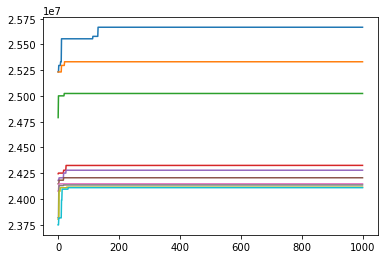

In [473]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(len(y_plot_list)):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

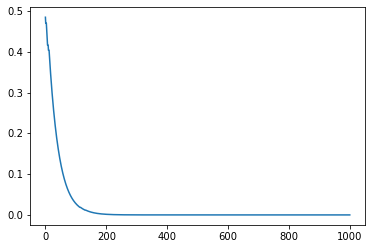

In [474]:
plt.plot(x_plot_list, var_s_plot_list)

plt.show()

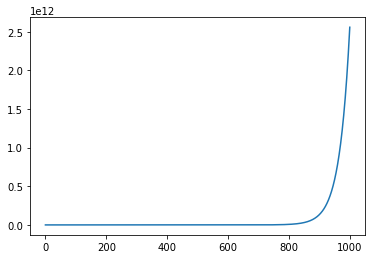

In [475]:
plt.plot(x_plot_list, var_a_plot_list)

plt.show()

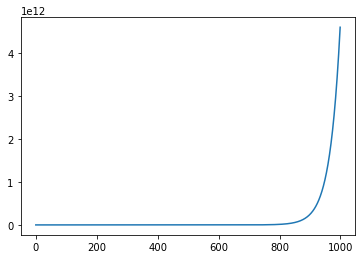

In [476]:
plt.plot(x_plot_list, var_b_plot_list)

plt.show()

In [477]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 51179.194435834885 seconds ---


In [478]:
import pickle

with open('era-solution/era_output-1-40', 'wb') as fp:
    pickle.dump(result, fp)
with open('era-solution/era_xplot-1-40', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('era-solution/era_yplot-1-40', 'wb') as fp:
    pickle.dump(y_plot_list, fp)
with open('era-solution/era_splot-1-40', 'wb') as fp:
    pickle.dump(var_s_plot_list, fp)
with open('era-solution/era_aplot-1-40', 'wb') as fp:
    pickle.dump(var_a_plot_list, fp)   
with open('era-solution/era_bplot-1-40', 'wb') as fp:
    pickle.dump(var_b_plot_list, fp)   

In [479]:
with open('era-solution/era_output-1-40', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

[[0, 20, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 47, 0.133], [3, 21, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 47, 0.133], [4, 11, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 49, 0.14], [5, 1, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 60, 0.171], [6, 18, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 71, 0.171], [7, 16, Timestamp('2020-11-20 19:32:05+0000', tz='UTC'), Timestamp('2020-11-21 04:04:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 20:31:38+0000', tz='UTC'), 

In [480]:
with open('era-solution/era_yplot-1-40', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

[[25233201.907628797, 25233201.907628797, 25296493.732628796, 25296493.732628796, 25296493.732628796, 25296493.732628796, 25296493.732628796, 25296493.732628796, 25332233.732628796, 25332233.732628796, 25332233.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796, 25555278.732628796

In [481]:
with open('era-solution/era_output-1-40', 'rb') as fp:
    read_result = pickle.load(fp)
    print(countFitness(read_result))
    
# print(read_result)

[25667343.603628792, 2105, 11782031, 22]
